<a href="https://colab.research.google.com/github/edhioliver/Analise-de-dados-com-Python-e-Pandas/blob/main/Trabalhando_Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importando a biblioteca
import pandas as pd


In [7]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [8]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [9]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [10]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [11]:
#Pegar uma amostra da base de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
48,Salvador,2019-01-01,127.28,1035,2
68,Natal,2018-06-22,274.00,852,3
90,Salvador,2019-01-01,100.54,1036,2
5,Salvador,2019-01-01,179.20,1037,3
43,Natal,2019-04-01,538.00,853,3


In [12]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [14]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [15]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [16]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [18]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [19]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [20]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [21]:
#Removendo linhas que estejam com vaores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [22]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [23]:
df.head()


,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [24]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [25]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [26]:
#Retornando a maior receita
df["Receita"].max()


3544.0

In [27]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [28]:
#nlargest  3 maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [29]:
#nsamllest 3 piores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [30]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [31]:
#Ordenando o conjunto de dados( ascending=False) do maior para o menor e (head(10)) as 10 primeiras linhas
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


### **Trabalhando com datas**

In [59]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [60]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade                      object
Data                         int64
Vendas                     float64
LojaID                      object
Qtde                         int64
Receita                    float64
Receita/Vendas             float64
Ano Venda                    int64
mes_venda                    int64
dia_venda                    int64
diferenca_dias     timedelta64[ns]
trimestre_venda              int64
dtype: object

In [61]:
#Transformando coluna de data que agora esta em int devolta para data
df["Data"] = pd.to_datetime(df["Data"])

In [62]:
df.dtypes

Cidade                      object
Data                datetime64[ns]
Vendas                     float64
LojaID                      object
Qtde                         int64
Receita                    float64
Receita/Vendas             float64
Ano Venda                    int64
mes_venda                    int64
dia_venda                    int64
diferenca_dias     timedelta64[ns]
trimestre_venda              int64
dtype: object

In [63]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [64]:
#criando uma nova coluna com o ano
df["Ano Venda"] = df["Data"].dt.year

In [65]:
#Pegando uma amostra de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
122,Recife,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days,1
225,Salvador,2019-01-02,36.23,1035,1,36.23,1.0,2019,1,2,366 days,1
216,Salvador,2019-01-02,5.82,1035,1,5.82,1.0,2019,1,2,366 days,1
22,Salvador,2019-01-01,32.57,1035,1,32.57,1.0,2019,1,1,365 days,1
188,Salvador,2019-01-02,178.11,1035,3,534.33,3.0,2019,1,2,366 days,1


In [66]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [67]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
128,Salvador,2019-03-02,36.84,1034,1,36.84,1.0,2019,3,2,425 days,1
66,Salvador,2019-01-01,70.20,1035,3,210.60,3.0,2019,1,1,365 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days,1
49,Aracaju,2018-01-01,53.74,1522,3,161.22,3.0,2018,1,1,0 days,1
85,Fortaleza,2019-01-01,149.00,1005,3,447.00,3.0,2019,1,1,365 days,1


In [68]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [69]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [70]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
82,Aracaju,2018-01-01,150.48,1522,4,601.92,4.0,2018,1,1,0 days,1
80,Fortaleza,2019-01-01,47.88,1003,2,95.76,2.0,2019,1,1,365 days,1
59,Natal,2018-01-15,369.00,853,2,738.00,2.0,2018,1,15,14 days,1
86,Recife,2019-01-01,17.83,982,8,142.64,8.0,2019,1,1,365 days,1
202,Natal,2019-01-02,22.45,1036,1,22.45,1.0,2019,1,2,366 days,1


In [71]:
#Criando a coluna de trimestre
#df["trimestre_venda"] = df["Data"].dt.quarter
df["trimestre_venda"] = df["Data"].dt.quarter

In [72]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019,3,26,449 days,1
129,Salvador,2019-03-02,125.66,1037,1,125.66,1.0,2019,3,2,425 days,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
148,Natal,2019-01-02,40.59,1037,3,121.77,3.0,2019,1,2,366 days,1
36,Recife,2019-01-01,146.62,983,6,879.72,6.0,2019,1,1,365 days,1


In [73]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [74]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [75]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
18,Natal,2019-03-14,581.00,853,3,1743.00,3.0,2019,3,14,437 days,1
125,Salvador,2019-03-02,25.00,1037,2,50.00,2.0,2019,3,2,425 days,1
129,Fortaleza,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2.0,2019,3,2,425 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,2019,3,2,425 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
121,Recife,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1


## **Visualização de dados**

In [49]:
#Verificar a quantidade de linhas na variável especificada
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

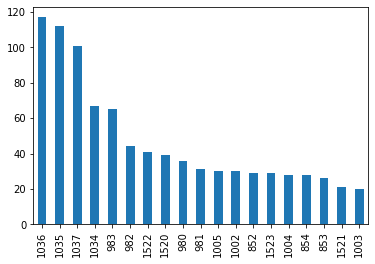

In [50]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

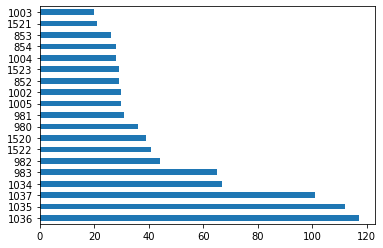

In [51]:
#Gráfico de barras horizontais   
#Para retirar a descrição acima do gráfico 
#é só  acrescentar o ponto e virgula no final do código,exemplo: 
#df["LojaID"].value_counts().plot.barh()
df["LojaID"].value_counts().plot.barh()

In [52]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh

<bound method PlotAccessor.barh of <pandas.plotting._core.PlotAccessor object at 0x7fe00bb07c50>>

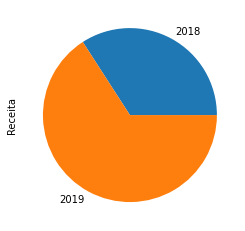

In [53]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [54]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

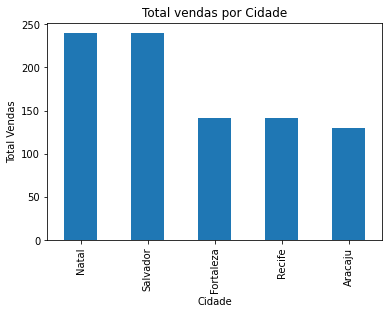

In [55]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

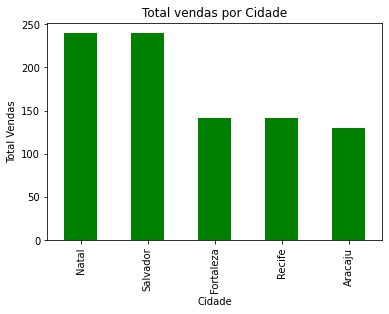

In [56]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [57]:
#Alterando o estilo
plt.style.use("ggplot")

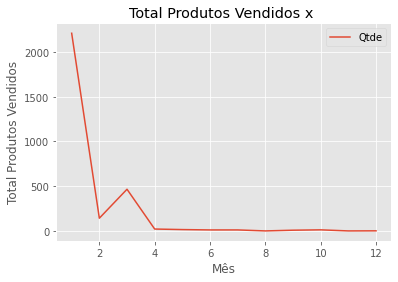

In [58]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x ")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()